In [1]:
import pandas as pd, networkx as nx, matplotlib.pyplot as plt
import re
import csv
import networkx as nx
import community
from networkx.algorithms import bipartite
import operator

In [2]:
#al csv originale, ho aggiunto l'header 'recipe' e 'link'
df = pd.read_csv('clean_graph.csv',sep='\t')
G=nx.Graph()
G.add_nodes_from(df['recipe'], color='red', bipartite=0) #nodi ricetta
G.add_nodes_from(df['link'], color='blue', bipartite=1) #nodi link
for index,row in df.iterrows():
    G.add_edge(row['recipe'], row['link'])

In [3]:
#In top_nodes ho i nodi che riguardano le ricette, in bottom_nodes ho quelli che riguardano i link
rec_nodes = {n for n, d in G.nodes(data=True) if d['bipartite']==0}
link_nodes = set(G) - rec_nodes
#print (top_nodes)
#print ("---------------------------------------------------------------------------------------------------------------------------------------------")
#print (bottom_nodes)

In [4]:
#tot ricette
TotRec = len(list(rec_nodes))
print("Numero distinto Totali di Nodi Ricette: " + str(TotRec))

Numero distinto Totali di Nodi Ricette: 117681


In [5]:
#tot link
TotLink = len(list(link_nodes))
print("Numero distinto Totali di Nodi Link: " + str(TotLink))

Numero distinto Totali di Nodi Link: 72812


In [6]:
#tot nodi
print("Numero distinto Totali di Nodi: " + str(len(G.nodes())))

Numero distinto Totali di Nodi: 190493


In [7]:
#tot archi
edge = len(G.edges())
print("Numero distinto Totali di Archi: " + str(edge))

Numero distinto Totali di Archi: 2008193


In [8]:
print("Il grafo è bipartito: " + str(bipartite.is_bipartite(G)))
print("Il grafo è connesso: " + str(nx.is_connected(G)))

Il grafo è bipartito: True
Il grafo è connesso: False


In [9]:
#grado medio di ric_nodes = TotArchi/TotRicette
Gmean_rec = edge/TotRec
#grado medio di link_nodes = TotArchi/TotLink
Gmean_link = edge/TotLink
#grado medio del grafo = K = 2*TotArchi/TotRicette+TotLink
Gmean = (2*edge) / (TotRec+TotLink)
print (Gmean_rec, Gmean_link, Gmean)

17.06471732905057 27.58052244135582 21.084165822366177


In [10]:
#densità del grafo
Dens_rec = bipartite.density(G,rec_nodes) #partizione ricette
Dens_link = bipartite.density(G,link_nodes) #partizione link
print (Dens_rec, Dens_link)

#densità totale del grafo = TotArchi/TotRicette+TotLink
print(edge/(TotRec+TotLink))

0.00023436682592224592 0.00023436682592224592
10.542082911183089


In [11]:
#restituisce un dizionario dove ad ogni nodo corrisponde il suo grado
degLINK,degREC=bipartite.degrees(G,rec_nodes)

#ordina in modo decrescente il dizionario in base al grado massimo del nodo
degLINK = sorted(degLINK, key=operator.itemgetter(1), reverse=True) 
print(degLINK[0])
degREC = sorted(degREC, key=operator.itemgetter(1), reverse=True)
print(degREC[0])

('ricette.giallozafferano.it', 77958)
('fette pane melanzane alici', 20)


In [ ]:
#clustering coefficient --> ognuno restituisce un dizionario con Nome:ClusteringCoeff
#sulle ricette
coeff_rec = bipartite.clustering(G, rec_nodes)
#sui link
coeff_link = bipartite.clustering(G, link_nodes)
#sull'intera rete
coeff_tot = bipartite.clustering(G)

#ordina in modo decrescente in base al coeff clustering
sorted_rec = sorted(coeff_rec.items(), key=operator.itemgetter(1), reverse=True)
sorted_link = sorted(coeff_link.items(), key=operator.itemgetter(1), reverse=True)
sorted_tot = sorted(coeff_tot.items(), key=operator.itemgetter(1,0), reverse=True)

#i top
print(sorted_rec[0])
print(sorted_link[0])
print(sorted_tot[0])

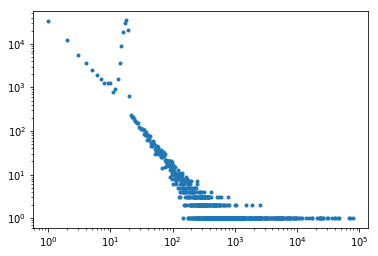

In [30]:
#distribuzione del grado di nodi
hist = nx.degree_histogram(G)
plt.plot(range(0,len(hist)),hist,".")
#plt.plot(GLink)
plt.yscale('log')
plt.xscale('log') 
plt.show()

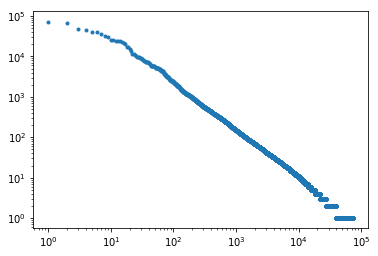

In [35]:
#distribuzione del grado dei link

GLink=[v for (k, v) in degLINK]
plt.plot(range(0,len(GLink)),GLink,".")
#plt.plot(GLink)
#plt.yscale('log')
#plt.xscale('log') 
plt.loglog()
plt.show()

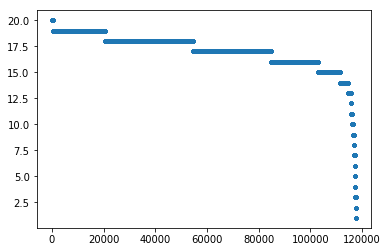

In [41]:
#distribuzione del grado delle ricette
GRec=[v for (k, v) in degREC]
plt.plot(range(0,len(GRec)),GRec,".")
plt.show()